#  Machine Learning / Machine Learning Fundamentals / Guided Project: Predicting Car Prices

## 1: Introduction To The Data Set
In this guided project, we will practice the machine learning workflow to predict a car's market price using its attributes. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names) and can download it directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).

* Read `import-85.data` into a dataframe named `cars`.
* You'll notice that the column names are missing from the dataframe. Use the column names from the data set's documentation to add the column names when reading the file into a dataframe.
* Determine which columns are numeric and can be used as features and which column is the target column.
* Display the first few rows of the dataframe.

In [1]:
import pandas as pd
cars = pd.read_csv("data/imports-85.data")
columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 
           'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 
           'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 
           'highway-mpg', 'price']
cars.columns = columns

In [2]:
print(cars.head())
print(cars.info())
print(cars.describe())

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          1                 ?  alfa-romero       gas        std          two   
2          2               164         audi       gas        std         four   
3          2               164         audi       gas        std         four   
4          2                 ?         audi       gas        std          two   

    body-style drive-wheels engine-location  wheel-base  ...    engine-size  \
0  convertible          rwd           front        88.6  ...            130   
1    hatchback          rwd           front        94.5  ...            152   
2        sedan          fwd           front        99.8  ...            109   
3        sedan          4wd           front        99.4  ...            136   
4        sedan          fwd           front        99.8  ...            136   

   fuel-system  bore  stroke compressi

---
Numeric columns that can be used as features:
* normalized-losses
* bore
* stroke
* horsepower
* peak-rpm


Target column
* price

---

## 2: Data Cleaning
We usually can't have any missing values if we want to use them for predictive modeling. Based on the data set preview from the last step, we can tell that the `normalized-losses` column contains missing values represented using `"?"`. Let's replace these values and look for the presence of missing values in other numeric columns. Let's also normalize the values in all numeric columns.

* Return the number of rows that have a missing value for the normalized-losses column. Determine how you should handle this column. You could:
  * Replace the missing values using the values from similar cars.
  * Drop the rows entirely (especially if other columns in those rows have missing values).
  * Drop the column entirely.
* Explore the missing value counts for the other numeric columns and handle any missing values.
* Of the columns you decided to keep, normalize the numeric ones so all values range from `0` to `1`.

In [3]:
numeric_cols = ["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm"]
for column in numeric_cols:
    print(column, " ", cars[column].value_counts()['?'])

normalized-losses   40
bore   4
stroke   4
horsepower   2
peak-rpm   2


---  

Drop the rows with missing values   

In [6]:
for column in numeric_cols:
    filter_missing_values = cars[column] != "?"
    cars = cars[filter_missing_values]
    #print(cars[column].value_counts())


---  

Convert the numeric columns to float type

In [7]:
for column in numeric_cols:
    cars[column] = cars[column].astype('float64') 
    #cars["normalized-losses"] = cars["normalized-losses"].astype('float64') 
print(cars.info())
print(cars.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 2 to 203
Data columns (total 26 columns):
symboling            160 non-null int64
normalized-losses    160 non-null float64
make                 160 non-null object
fuel-type            160 non-null object
aspiration           160 non-null object
num-of-doors         160 non-null object
body-style           160 non-null object
drive-wheels         160 non-null object
engine-location      160 non-null object
wheel-base           160 non-null float64
length               160 non-null float64
width                160 non-null float64
height               160 non-null float64
curb-weight          160 non-null int64
engine-type          160 non-null object
num-of-cylinders     160 non-null object
engine-size          160 non-null int64
fuel-system          160 non-null object
bore                 160 non-null float64
stroke               160 non-null float64
compression-ratio    160 non-null float64
horsepower           160 non-

---  

Select the numeric columns.
Normalize all the numeric columns so that values range from 0 to 1.
Create a new dataframe with only the normalized numeric columns.

In [8]:
import numpy as np
#cars_num = cars.select_dtypes(include=[np.float, np.int])
cars_num = cars.select_dtypes(include=['float64', 'int64'])
#cars_num = cars_num.select_dtypes(include=[np.float])
cars_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 2 to 203
Data columns (total 15 columns):
symboling            160 non-null int64
normalized-losses    160 non-null float64
wheel-base           160 non-null float64
length               160 non-null float64
width                160 non-null float64
height               160 non-null float64
curb-weight          160 non-null int64
engine-size          160 non-null int64
bore                 160 non-null float64
stroke               160 non-null float64
compression-ratio    160 non-null float64
horsepower           160 non-null float64
peak-rpm             160 non-null float64
city-mpg             160 non-null int64
highway-mpg          160 non-null int64
dtypes: float64(10), int64(5)
memory usage: 20.0 KB


In [9]:
cars_normalized = (cars_num - cars_num.min()) / (cars_num.max() - cars_num.min())
print(cars_normalized.head())
print(cars_normalized.info())
print(cars_normalized.describe())

   symboling  normalized-losses  wheel-base    length     width    height  \
2        0.8           0.518325    0.455172  0.577236  0.517544  0.471154   
3        0.8           0.518325    0.441379  0.577236  0.535088  0.471154   
5        0.6           0.486911    0.662069  0.839024  0.973684  0.605769   
7        0.6           0.486911    0.662069  0.839024  0.973684  0.625000   
9        0.8           0.664921    0.503448  0.580488  0.394737  0.471154   

   curb-weight  engine-size      bore    stroke  compression-ratio  \
2     0.329325     0.243655  0.464286  0.633333            0.18750   
3     0.518231     0.380711  0.464286  0.633333            0.06250   
5     0.525989     0.380711  0.464286  0.633333            0.09375   
7     0.619860     0.355330  0.421429  0.633333            0.08125   
9     0.351823     0.238579  0.685714  0.347619            0.11250   

   horsepower  peak-rpm  city-mpg  highway-mpg  
2    0.355263  0.551020  0.264706     0.333333  
3    0.440789  0.5

---  

Convert the target column to float type.
Append the target column to the normalized dataframe.

In [10]:
cars["price"] = cars["price"].astype('float64')
cars_normalized["price"] = cars["price"]
print(cars_normalized.head())
print(cars_normalized.info())
print(cars_normalized.describe())

   symboling  normalized-losses  wheel-base    length     width    height  \
2        0.8           0.518325    0.455172  0.577236  0.517544  0.471154   
3        0.8           0.518325    0.441379  0.577236  0.535088  0.471154   
5        0.6           0.486911    0.662069  0.839024  0.973684  0.605769   
7        0.6           0.486911    0.662069  0.839024  0.973684  0.625000   
9        0.8           0.664921    0.503448  0.580488  0.394737  0.471154   

   curb-weight  engine-size      bore    stroke  compression-ratio  \
2     0.329325     0.243655  0.464286  0.633333            0.18750   
3     0.518231     0.380711  0.464286  0.633333            0.06250   
5     0.525989     0.380711  0.464286  0.633333            0.09375   
7     0.619860     0.355330  0.421429  0.633333            0.08125   
9     0.351823     0.238579  0.685714  0.347619            0.11250   

   horsepower  peak-rpm  city-mpg  highway-mpg    price  
2    0.355263  0.551020  0.264706     0.333333  13950.0  


## 3: Univariate Model
Let's start with some univariate k-nearest neighbors models. Starting with simple models before moving to more complex models helps us structure your code workflow and understand the features better.

* Create a function, named `knn_train_test()` that encapsulates the training and simple validation process. This function should have 2 parameters -- column name as a string and the dataframe object.
  * This function should split the data set into a training and test set.
  * Then, it should instantiate the KNeighborsRegressor class, fit the model on the training set, and make predictions on the test set.
  * Finally, it should calculate the RMSE and return that value.
* Use this function to train and test univariate models using the different numeric columns in the data set. Identify the  columns that perform the best using the default `k` value.

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

rmse_dict = {}

def knn_train_test(col, df):
    #randomize
    np.random.seed(1)
    shuffled_idx = np.random.permutation(df.index)
    df = df.loc[shuffled_idx]
    
    #split dataset into training and test set
    rec_count = len(df)
    train_df_count = int(round(0.75 * len(df))) - 1
    train_df = df.iloc[0: train_df_count]
    test_df = df.iloc[train_df_count: ]
    
    #instantiate a KNeighborsRegressor class
    knn = KNeighborsRegressor()
    
    #fit model
    knn.fit(train_df[[col]], train_df["price"])
    
    #predict
    predictions = knn.predict(test_df[[col]])
    
    #calculate RMSE
    mse = mean_squared_error(test_df["price"], predictions)
    rmse = mse ** (0.5)
    #print(col, " :", rmse)
    rmse_dict[col] = rmse

#call function with different columns
feature_cols = cars_num.columns.tolist()
for column in feature_cols:
    knn_train_test(column, cars_normalized)

#print(rmse_dict)
rmse_sorted_keys = sorted(rmse_dict, key=rmse_dict.get, reverse=False)
#print(rmse_sorted_keys)
for col in rmse_sorted_keys:
    print (col, rmse_dict[col]) 


curb-weight 2651.45451661
width 2706.76761632
engine-size 2794.27252298
highway-mpg 3178.74254553
city-mpg 3222.32057345
horsepower 3803.22521719
length 4402.89337928
wheel-base 4971.91495679
bore 4972.91899342
normalized-losses 5151.66344767
stroke 5567.31970473
height 5767.0043175
peak-rpm 6043.26515145
symboling 6196.82045813
compression-ratio 6968.28228384


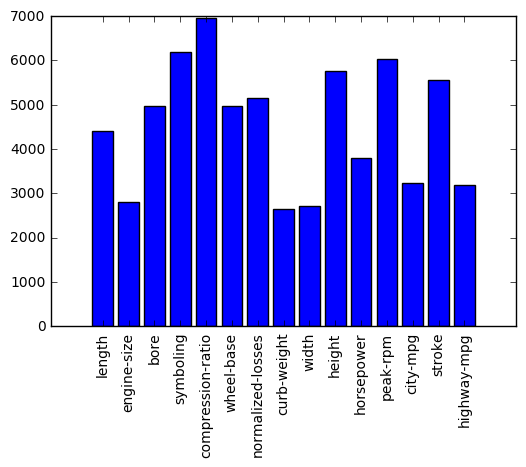

In [17]:
plt.bar(range(len(rmse_dict)), rmse_dict.values(), align='center')
plt.xticks(range(len(rmse_dict)), list(rmse_dict.keys()), rotation=90)
plt.show()

---

Columns that perform best with default k-value:
* curb-weight 2651.45451661
* width 2706.76761632
* engine-size 2794.27252298
* highway-mpg 3178.74254553
* city-mpg 3222.32057345

---

* Create a modified version of the knn_train_test() function to accept a parameter for the `k` value.
  * Update the function logic to use this parameter.
  * For each numeric column, create, train, and test a univariate model using the following `k` values (`1`, `3`, `5`, `7`, and `9`). For each `k` value, plot a histogram of the RMSE values.

city-mpg 2768.75828909
engine-size 2860.67765296
width 3454.28188859
curb-weight 3543.23649073
highway-mpg 3599.2219315
length 3926.16486987
horsepower 4280.38947966
normalized-losses 4771.76334948
stroke 5220.5225722
wheel-base 5695.20127484
bore 6081.08018726
symboling 6645.18766275
peak-rpm 6771.43472206
compression-ratio 8086.83353269
height 8735.39199003
['city-mpg']
list_entry= [1, 'top1', 2768.7582890918152, ['city-mpg']]
top_col_list= [[1, 'top1', 2768.7582890918152, ['city-mpg']]]
['city-mpg', 'engine-size']
list_entry= [1, 'top2', 2814.717971026048, ['city-mpg', 'engine-size']]
top_col_list= [[1, 'top1', 2768.7582890918152, ['city-mpg']], [1, 'top2', 2814.717971026048, ['city-mpg', 'engine-size']]]
['city-mpg', 'engine-size', 'width']
list_entry= [1, 'top3', 3027.9059435479812, ['city-mpg', 'engine-size', 'width']]
top_col_list= [[1, 'top1', 2768.7582890918152, ['city-mpg']], [1, 'top2', 2814.717971026048, ['city-mpg', 'engine-size']], [1, 'top3', 3027.9059435479812, ['city-m

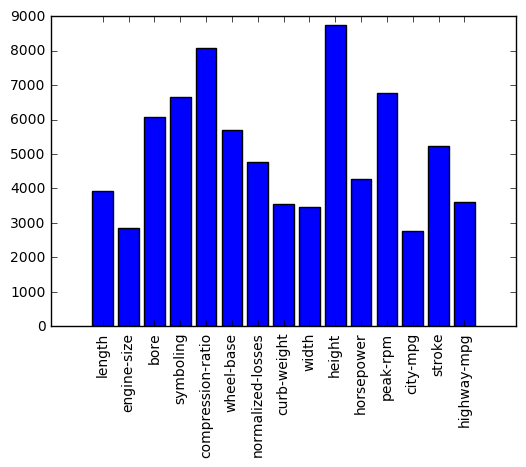

width 2542.09633313
engine-size 2729.80954893
curb-weight 2919.15141919
highway-mpg 3124.02950784
city-mpg 3319.93989563
horsepower 3769.01656535
length 4061.72540333
normalized-losses 4263.6669136
bore 5103.03330672
stroke 5278.03124121
wheel-base 5400.3200806
height 6285.37158935
peak-rpm 6463.36318626
symboling 6750.60702279
compression-ratio 7328.46141123
['width']
list_entry= [3, 'top1', 2542.0963331348539, ['width']]
top_col_list= [[1, 'top1', 2768.7582890918152, ['city-mpg']], [1, 'top2', 2814.717971026048, ['city-mpg', 'engine-size']], [1, 'top3', 3027.9059435479812, ['city-mpg', 'engine-size', 'width']], [1, 'top4', 3156.7385803444613, ['city-mpg', 'engine-size', 'width', 'curb-weight']], [1, 'top5', 3245.2352505756949, ['city-mpg', 'engine-size', 'width', 'curb-weight', 'highway-mpg']], [3, 'top1', 2542.0963331348539, ['width']]]
['width', 'engine-size']
list_entry= [3, 'top2', 2635.9529410335554, ['width', 'engine-size']]
top_col_list= [[1, 'top1', 2768.7582890918152, ['city

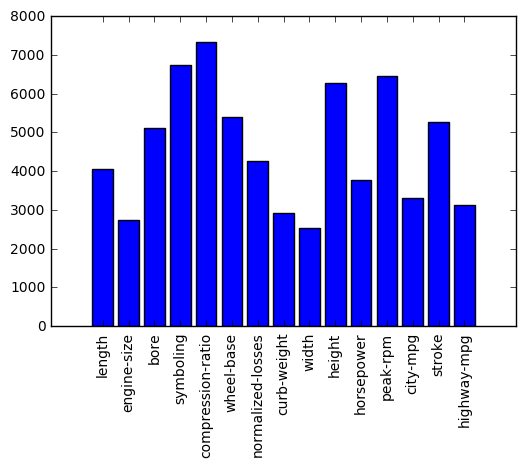

curb-weight 2651.45451661
width 2706.76761632
engine-size 2794.27252298
highway-mpg 3178.74254553
city-mpg 3222.32057345
horsepower 3803.22521719
length 4402.89337928
wheel-base 4971.91495679
bore 4972.91899342
normalized-losses 5151.66344767
stroke 5567.31970473
height 5767.0043175
peak-rpm 6043.26515145
symboling 6196.82045813
compression-ratio 6968.28228384
['curb-weight']
list_entry= [5, 'top1', 2651.4545166113135, ['curb-weight']]
top_col_list= [[1, 'top1', 2768.7582890918152, ['city-mpg']], [1, 'top2', 2814.717971026048, ['city-mpg', 'engine-size']], [1, 'top3', 3027.9059435479812, ['city-mpg', 'engine-size', 'width']], [1, 'top4', 3156.7385803444613, ['city-mpg', 'engine-size', 'width', 'curb-weight']], [1, 'top5', 3245.2352505756949, ['city-mpg', 'engine-size', 'width', 'curb-weight', 'highway-mpg']], [3, 'top1', 2542.0963331348539, ['width']], [3, 'top2', 2635.9529410335554, ['width', 'engine-size']], [3, 'top3', 2730.3524337507197, ['width', 'engine-size', 'curb-weight']], [3

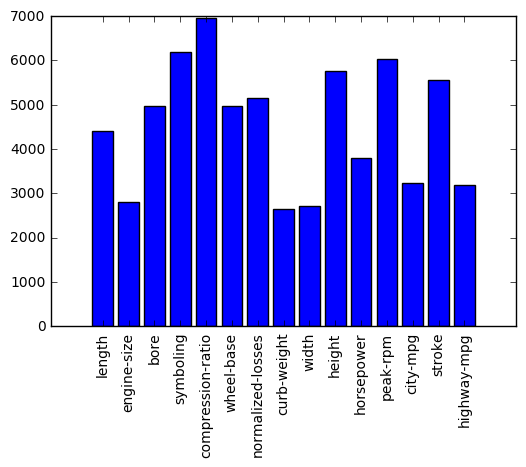

width 2865.54132679
curb-weight 2968.22345719
city-mpg 3181.76986149
highway-mpg 3437.90158384
engine-size 3467.19835028
horsepower 3566.43335736
length 4296.38709646
bore 4798.46930276
wheel-base 4800.41300275
stroke 5488.45635151
normalized-losses 5623.81688025
height 5744.98410891
symboling 5877.97320507
peak-rpm 6286.63505095
compression-ratio 6805.35958387
['width']
list_entry= [7, 'top1', 2865.5413267949803, ['width']]
top_col_list= [[1, 'top1', 2768.7582890918152, ['city-mpg']], [1, 'top2', 2814.717971026048, ['city-mpg', 'engine-size']], [1, 'top3', 3027.9059435479812, ['city-mpg', 'engine-size', 'width']], [1, 'top4', 3156.7385803444613, ['city-mpg', 'engine-size', 'width', 'curb-weight']], [1, 'top5', 3245.2352505756949, ['city-mpg', 'engine-size', 'width', 'curb-weight', 'highway-mpg']], [3, 'top1', 2542.0963331348539, ['width']], [3, 'top2', 2635.9529410335554, ['width', 'engine-size']], [3, 'top3', 2730.3524337507197, ['width', 'engine-size', 'curb-weight']], [3, 'top4', 2

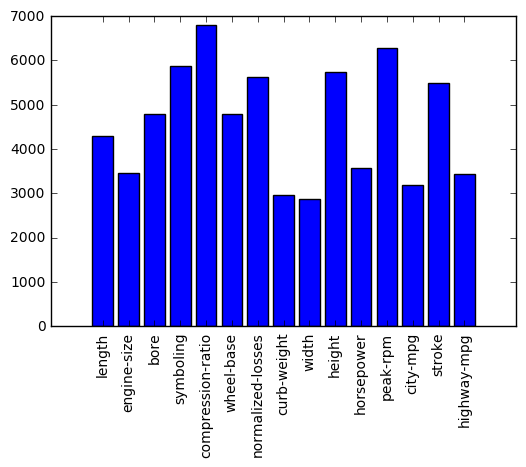

width 3024.49221407
curb-weight 3027.84852467
city-mpg 3219.2590906
highway-mpg 3504.7646001
horsepower 3598.39068482
engine-size 3723.31111359
length 4224.59152746
bore 4764.74775223
wheel-base 4808.59643323
stroke 5607.03818868
normalized-losses 5955.02631509
height 5958.55924325
symboling 6147.84402644
peak-rpm 6563.23459394
compression-ratio 6644.05896603
['width']
list_entry= [9, 'top1', 3024.4922140693257, ['width']]
top_col_list= [[1, 'top1', 2768.7582890918152, ['city-mpg']], [1, 'top2', 2814.717971026048, ['city-mpg', 'engine-size']], [1, 'top3', 3027.9059435479812, ['city-mpg', 'engine-size', 'width']], [1, 'top4', 3156.7385803444613, ['city-mpg', 'engine-size', 'width', 'curb-weight']], [1, 'top5', 3245.2352505756949, ['city-mpg', 'engine-size', 'width', 'curb-weight', 'highway-mpg']], [3, 'top1', 2542.0963331348539, ['width']], [3, 'top2', 2635.9529410335554, ['width', 'engine-size']], [3, 'top3', 2730.3524337507197, ['width', 'engine-size', 'curb-weight']], [3, 'top4', 282

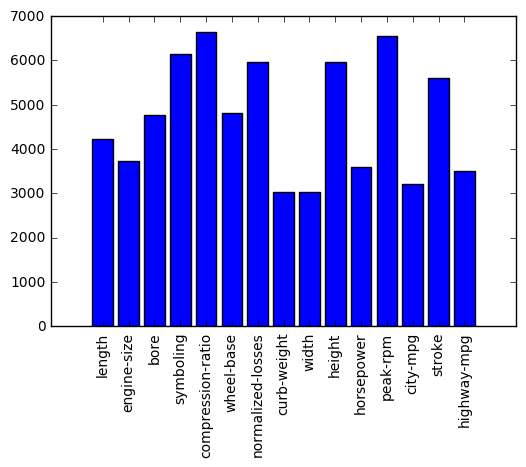

[[1, 'top1', 2768.7582890918152, ['city-mpg']], [1, 'top2', 2814.717971026048, ['city-mpg', 'engine-size']], [1, 'top3', 3027.9059435479812, ['city-mpg', 'engine-size', 'width']], [1, 'top4', 3156.7385803444613, ['city-mpg', 'engine-size', 'width', 'curb-weight']], [1, 'top5', 3245.2352505756949, ['city-mpg', 'engine-size', 'width', 'curb-weight', 'highway-mpg']], [3, 'top1', 2542.0963331348539, ['width']], [3, 'top2', 2635.9529410335554, ['width', 'engine-size']], [3, 'top3', 2730.3524337507197, ['width', 'engine-size', 'curb-weight']], [3, 'top4', 2828.7717022729848, ['width', 'engine-size', 'curb-weight', 'highway-mpg']], [3, 'top5', 2927.0053409435859, ['width', 'engine-size', 'curb-weight', 'highway-mpg', 'city-mpg']], [5, 'top1', 2651.4545166113135, ['curb-weight']], [5, 'top2', 2679.1110664676735, ['curb-weight', 'width']], [5, 'top3', 2717.4982186385628, ['curb-weight', 'width', 'engine-size']], [5, 'top4', 2832.8093003602098, ['curb-weight', 'width', 'engine-size', 'highway-mp

In [41]:
def knn_train_test_with_k(col, df, k):
    #randomize
    np.random.seed(1)
    shuffled_idx = np.random.permutation(df.index)
    df = df.loc[shuffled_idx]
    
    #split dataset into training and test set
    rec_count = len(df)
    train_df_count = int(round(0.75 * len(df))) - 1
    train_df = df.iloc[0: train_df_count]
    test_df = df.iloc[train_df_count: ]
    
    #instantiate a KNeighborsRegressor class
    knn = KNeighborsRegressor(n_neighbors=k)
    
    #fit model
    knn.fit(train_df[[col]], train_df["price"])
    
    #predict
    predictions = knn.predict(test_df[[col]])
    
    #calculate RMSE
    mse = mean_squared_error(test_df["price"], predictions)
    rmse = mse ** (0.5)
    #print(col, " :", rmse)
    rmse_dict[col] = rmse
    

top_col_list = []
k_values = [1, 3, 5, 7, 9]
#call function with different k values
for k in k_values:
    rmse_dict = {}
    #call function with different columns
    for column in feature_cols:
        knn_train_test_with_k(column, cars_normalized, k)
    #print(rmse_dict)
    rmse_sorted_keys = sorted(rmse_dict, key=rmse_dict.get, reverse=False)
    #print(rmse_sorted_keys)
    
    for col in rmse_sorted_keys:
        print (col, rmse_dict[col])
    
    #average RMSE for top 2,3,4,5 cols
    rmse_total = 0
    col_count = 0
    col_list = []
    
    for col in rmse_sorted_keys[0:5]:
        list_entry = []
        col_count += 1
        rmse_total += rmse_dict[col]
        col_list.append(col)
        temp_list = []
        temp_list = col_list
        print(col_list)
        #print ("top",col_count,":", rmse_total / col_count)
        list_entry = [k, "top"+str(col_count), rmse_total / col_count, temp_list[:col_count]]
        print("list_entry=",list_entry)
        top_col_list.append(list_entry)
        print("top_col_list=",top_col_list)
             
    print("k=", k)
    plt.bar(range(len(rmse_dict)), rmse_dict.values(), align='center')
    plt.xticks(range(len(rmse_dict)), list(rmse_dict.keys()), rotation=90)
    plt.show()
    
print(top_col_list)

In [42]:
for x in top_col_list:
    print(x)

[1, 'top1', 2768.7582890918152, ['city-mpg']]
[1, 'top2', 2814.717971026048, ['city-mpg', 'engine-size']]
[1, 'top3', 3027.9059435479812, ['city-mpg', 'engine-size', 'width']]
[1, 'top4', 3156.7385803444613, ['city-mpg', 'engine-size', 'width', 'curb-weight']]
[1, 'top5', 3245.2352505756949, ['city-mpg', 'engine-size', 'width', 'curb-weight', 'highway-mpg']]
[3, 'top1', 2542.0963331348539, ['width']]
[3, 'top2', 2635.9529410335554, ['width', 'engine-size']]
[3, 'top3', 2730.3524337507197, ['width', 'engine-size', 'curb-weight']]
[3, 'top4', 2828.7717022729848, ['width', 'engine-size', 'curb-weight', 'highway-mpg']]
[3, 'top5', 2927.0053409435859, ['width', 'engine-size', 'curb-weight', 'highway-mpg', 'city-mpg']]
[5, 'top1', 2651.4545166113135, ['curb-weight']]
[5, 'top2', 2679.1110664676735, ['curb-weight', 'width']]
[5, 'top3', 2717.4982186385628, ['curb-weight', 'width', 'engine-size']]
[5, 'top4', 2832.8093003602098, ['curb-weight', 'width', 'engine-size', 'highway-mpg']]
[5, 'top5

The columns that perform best with for various k values:
* width 
* curb-weight
* city-mpg
* engine-size
* highway-mpg

The best 2 features using the best `k` value (k=3):
* width 2542.09633313
* engine-size 2729.80954893

The best 3 features using the best `k` value (k=5):
* curb-weight 2651.45451661
* width 2706.76761632
* engine-size 2794.27252298

The best 4 features using the best `k` value (k=3):
* width 2542.09633313
* engine-size 2729.80954893
* curb-weight 2919.15141919
* highway-mpg 3124.02950784

The best 5 features using the best `k` value (k=5):
* curb-weight 2651.45451661
* width 2706.76761632
* engine-size 2794.27252298
* highway-mpg 3178.74254553
* city-mpg 3222.32057345


The best univariate models give RMSE in the range **2542** to **3222** for the top 5 parameters.

---

## 4: Multivariate Model
Create a modified version of the knn_train_test() function to work with multiple columns.

* Modify the `knn_train_test()` function to accept a list of column names (instead of just a string). Modify the rest of the function logic to use this parameter:
  * Instead of using just a single column for train and test, use all of the columns passed in.
* Use the best 2 features from the previous step to train and test a multivariate k-nearest neighbors model using the best `k` value (lowest RMSE) from the previous step.
* Use the best 3 features from the previous step to train and test a multivariate k-nearest neighbors model using the best `k` value (lowest RMSE) from the previous step.
* Use the best 4 features from the previous step to train and test a multivariate k-nearest neighbors model using the best `k` value (lowest RMSE) from the previous step.
* Use the best 5 features from the previous step to train and test a multivariate k-nearest neighbors model using the best `k` value (lowest RMSE) from the previous step.
* Display all of the RMSE values.

In [47]:
def knn_train_test_with_k_mult_cols(feature_cols, df, k):
    #randomize
    np.random.seed(1)
    shuffled_idx = np.random.permutation(df.index)
    df = df.loc[shuffled_idx]
    
    #split dataset into training and test set
    rec_count = len(df)
    train_df_count = int(round(0.75 * len(df))) - 1
    train_df = df.iloc[0: train_df_count]
    test_df = df.iloc[train_df_count: ]
    
    #instantiate a KNeighborsRegressor class
    knn = KNeighborsRegressor(n_neighbors=k)
    
    #fit model
    knn.fit(train_df[feature_cols], train_df["price"])
    
    #predict
    predictions = knn.predict(test_df[feature_cols])
    
    #calculate RMSE
    mse = mean_squared_error(test_df["price"], predictions)
    rmse = mse ** (0.5)
    #print(rmse)
    #print()
    return rmse
    #print(col, " :", rmse)
    #rmse_dict[feature_cols] = rmse
    
lst = [["top2",3],["top3",5],["top4",3],["top5",5]]
for item in lst:
    for x in top_col_list:
        if x[0]==item[1] and x[1]==item[0]:
            rmse_dict = {}
            feature_cols=x[3]
            k=x[0]
            print("rmse using", item[0], "columns and k =", item[1], ":")
            print(feature_cols)
            print(knn_train_test_with_k_mult_cols(feature_cols, cars_normalized, k))
            print()
            

rmse using top2 columns and k = 3 :
['width', 'engine-size']
2409.24105379

rmse using top3 columns and k = 5 :
['curb-weight', 'width', 'engine-size']
2342.53432513

rmse using top4 columns and k = 3 :
['width', 'engine-size', 'curb-weight', 'highway-mpg']
2241.24271205

rmse using top5 columns and k = 5 :
['curb-weight', 'width', 'engine-size', 'highway-mpg', 'city-mpg']
2237.81218681



These are the top 3 models 

* parameters ['curb-weight', 'width', 'engine-size'] and k=5
2342.53432513

* parameters ['width', 'engine-size', 'curb-weight', 'highway-mpg'] and k=3
2241.24271205

* parameters ['curb-weight', 'width', 'engine-size', 'highway-mpg', 'city-mpg'] and k=5
2237.81218681


RMSE is in the range **2237** to **2342**

---

## 5: Hyperparameter Tuning
Let's now optimize the 3 models that performed the best in the previous step.

* For the top 3 models, vary the hyperparameter value from 1 to 25 and plot the resulting RMSE values.
* Determine which k value is optimal for each model.

Model #1 with feature columns  ['curb-weight', 'width', 'engine-size']
2 1835.77796528
1 2025.76654567
3 2185.00388272
5 2342.53432513
4 2374.53143805
7 2635.73066395
6 2650.68489603
8 2714.81571574
9 2880.76212189
10 2966.83072486
11 2997.27524542
12 3015.44934887
13 3027.42698736
17 3030.93728477
15 3037.04537074
14 3052.16813671
16 3053.34992274
18 3065.2767018
19 3096.10223238
20 3155.72259716
21 3239.74448216
22 3257.448316
24 3299.68851577
23 3314.17974675
25 3326.29695595


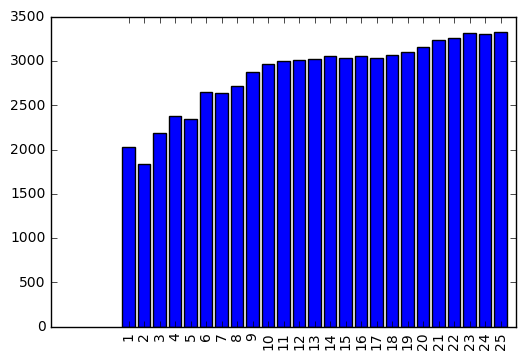

In [54]:
# Model1 
def knn_train_test_with_k_mult_cols(feature_cols, df, k):
    #randomize
    np.random.seed(1)
    shuffled_idx = np.random.permutation(df.index)
    df = df.loc[shuffled_idx]
    
    #split dataset into training and test set
    rec_count = len(df)
    train_df_count = int(round(0.75 * len(df))) - 1
    train_df = df.iloc[0: train_df_count]
    test_df = df.iloc[train_df_count: ]
    
    #instantiate a KNeighborsRegressor class
    knn = KNeighborsRegressor(n_neighbors=k)
    
    #fit model
    knn.fit(train_df[feature_cols], train_df["price"])
    
    #predict
    predictions = knn.predict(test_df[feature_cols])
    
    #calculate RMSE
    mse = mean_squared_error(test_df["price"], predictions)
    rmse = mse ** (0.5)
    rmse_dict[k] = rmse
    return rmse
    
feature_cols = ['curb-weight', 'width', 'engine-size']    
print("Model #1 with feature columns ", feature_cols)
rmse_dict = {}
for k in range(1,26):
    knn_train_test_with_k_mult_cols(feature_cols, cars_normalized, k)
           
#print(rmse_dict)
rmse_sorted_keys = sorted(rmse_dict, key=rmse_dict.get, reverse=False)
#print(rmse_sorted_keys)
for k in rmse_sorted_keys:
    print (k, rmse_dict[k])

plt.bar(range(len(rmse_dict)), rmse_dict.values(), align='center')
plt.xticks(range(len(rmse_dict)), list(rmse_dict.keys()), rotation=90)
plt.show()

Model #2 with feature columns  ['width', 'engine-size', 'curb-weight', 'highway-mpg']
2 1718.95765176
1 1812.71229875
3 2241.24271205
4 2321.94657909
6 2483.32317317
5 2528.86305062
7 2568.05936883
8 2692.95394709
9 2789.80082311
10 2898.206565
12 2921.33140833
14 2938.77425887
11 2949.68944986
13 2954.25677947
15 2986.64706645
17 2999.49126522
16 3015.47891699
18 3054.60378341
19 3064.28628818
20 3086.82511296
21 3143.89452976
22 3164.52848574
23 3189.39461266
24 3207.36815471
25 3217.49663664


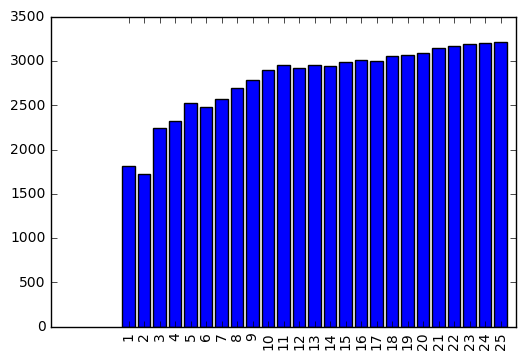

In [55]:
# Model2
def knn_train_test_with_k_mult_cols(feature_cols, df, k):
    #randomize
    np.random.seed(1)
    shuffled_idx = np.random.permutation(df.index)
    df = df.loc[shuffled_idx]
    
    #split dataset into training and test set
    rec_count = len(df)
    train_df_count = int(round(0.75 * len(df))) - 1
    train_df = df.iloc[0: train_df_count]
    test_df = df.iloc[train_df_count: ]
    
    #instantiate a KNeighborsRegressor class
    knn = KNeighborsRegressor(n_neighbors=k)
    
    #fit model
    knn.fit(train_df[feature_cols], train_df["price"])
    
    #predict
    predictions = knn.predict(test_df[feature_cols])
    
    #calculate RMSE
    mse = mean_squared_error(test_df["price"], predictions)
    rmse = mse ** (0.5)
    rmse_dict[k] = rmse
    return rmse
    
feature_cols = ['width', 'engine-size', 'curb-weight', 'highway-mpg']    
print("Model #2 with feature columns ", feature_cols)
rmse_dict = {}
for k in range(1,26):
    knn_train_test_with_k_mult_cols(feature_cols, cars_normalized, k)
           
#print(rmse_dict)
rmse_sorted_keys = sorted(rmse_dict, key=rmse_dict.get, reverse=False)
#print(rmse_sorted_keys)
for k in rmse_sorted_keys:
    print (k, rmse_dict[k])

plt.bar(range(len(rmse_dict)), rmse_dict.values(), align='center')
plt.xticks(range(len(rmse_dict)), list(rmse_dict.keys()), rotation=90)
plt.show()

Model #3 with feature columns  ['curb-weight', 'width', 'engine-size', 'highway-mpg', 'city-mpg']
2 1697.44937961
1 1809.29983763
3 2143.10059491
4 2160.22898268
5 2237.81218681
6 2285.15229963
7 2409.21545498
8 2562.3641327
9 2776.93719168
17 2904.95299707
18 2922.2112385
10 2927.89859693
12 2930.68233254
16 2942.28563521
13 2950.33315094
15 2960.47909056
19 2967.52147269
14 2968.03407815
11 3020.59245511
20 3032.93109974
21 3073.09447991
22 3074.49086738
23 3121.20265989
24 3163.0871741
25 3214.0606405


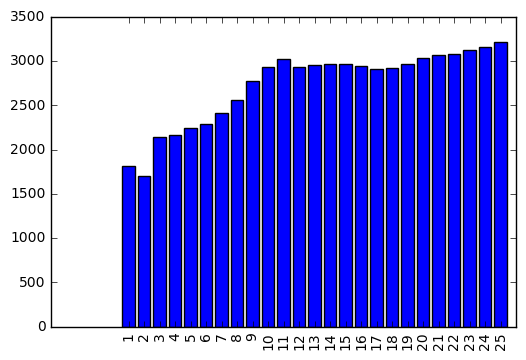

In [56]:
# Model3
def knn_train_test_with_k_mult_cols(feature_cols, df, k):
    #randomize
    np.random.seed(1)
    shuffled_idx = np.random.permutation(df.index)
    df = df.loc[shuffled_idx]
    
    #split dataset into training and test set
    rec_count = len(df)
    train_df_count = int(round(0.75 * len(df))) - 1
    train_df = df.iloc[0: train_df_count]
    test_df = df.iloc[train_df_count: ]
    
    #instantiate a KNeighborsRegressor class
    knn = KNeighborsRegressor(n_neighbors=k)
    
    #fit model
    knn.fit(train_df[feature_cols], train_df["price"])
    
    #predict
    predictions = knn.predict(test_df[feature_cols])
    
    #calculate RMSE
    mse = mean_squared_error(test_df["price"], predictions)
    rmse = mse ** (0.5)
    rmse_dict[k] = rmse
    return rmse
    

feature_cols = ['curb-weight', 'width', 'engine-size', 'highway-mpg', 'city-mpg']
print("Model #3 with feature columns ", feature_cols)
rmse_dict = {}
for k in range(1,26):
    knn_train_test_with_k_mult_cols(feature_cols, cars_normalized, k)
           
#print(rmse_dict)
rmse_sorted_keys = sorted(rmse_dict, key=rmse_dict.get, reverse=False)
#print(rmse_sorted_keys)
for k in rmse_sorted_keys:
    print (k, rmse_dict[k])

plt.bar(range(len(rmse_dict)), rmse_dict.values(), align='center')
plt.xticks(range(len(rmse_dict)), list(rmse_dict.keys()), rotation=90)
plt.show()

All 3 models have optimal RMSE for k-value of 2. The optimal RMSEs range from **1697** to **1835**.

The best model is Model \#3 with feature columns  ['curb-weight', 'width', 'engine-size', 'highway-mpg', 'city-mpg'] and k=2. RMSE for this model is **1697**